In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from statistics import mean
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [137]:
df = pd.read_csv('netflix_originals.csv')

In [139]:
df.head(10)

,titles,years,genres,imdb,runtime,description,stars,votes,type,original
0,Zumbo's Just Desserts,2016,Reality-TV,6.9,52 min,Amateur Australian chefs compete to impress pa...,"Gigi Falanga, Rachel Khoo, Adriano Zumbo","1,779",TV Show,Netflix
1,Zona Rosa,2019,Comedy,6.0,NaN,Add a Plot,"Ray Contreras, Pablo Morán, Manu Nna, Ana Juli...",33,TV Show,Netflix
2,Young Wallander,2020,"Crime, Drama, Mystery",6.7,NaN,Follow recently graduated police officer Kurt ...,"Adam Pålsson, Leanne Best, Richard Dillane, El...","5,419",TV Show,Netflix
3,You vs. Wild,2019,"Adventure, Reality-TV",6.7,20 min,"In this interactive series, you'll make key de...",Bear Grylls,"1,977",TV Show,Netflix
4,You,2018,"Crime, Drama, Romance",7.8,45 min,"A dangerously charming, intensely obsessive yo...","Penn Badgley, Victoria Pedretti, Ambyr Childer...","134,932",TV Show,Netflix
5,YooHoo to the Rescue,2019,Family,6.9,NaN,"In a series of magical missions, quick-witted ...","Ryan Bartley, Kira Buckland, Lucien Dodge, Kyl...",37,TV Show,Netflix
6,Yankee,2019,Drama,6.0,40 min,"On the run from the police, an Arizona man cro...","Pablo Lyle, Ana Layevska, Pamela Almanza, Seba...",458,TV Show,Netflix
7,Wu Assassins,2019,"Action, Crime, Drama",6.4,44 min,A warrior chosen as the latest and last Wu Ass...,"Iko Uwais, Byron Mann, Li Jun Li, Lawrence Kao","9,336",TV Show,Netflix
8,World's Most Wanted,2020,"Documentary, Crime",7.1,NaN,Heinous criminals have avoided capture despite...,"Jennifer Julian, Thomas Fuentes, Calogero Germ...","1,495",TV Show,Netflix
9,World of Winx,2016,"Animation, Action, Comedy",6.8,30 min,The Winx travel all over the world searching f...,"Rebecca Soler, Alysha Deslorieux, Haven Pascha...",556,TV Show,Netflix


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   titles       1517 non-null   object 
 1   years        1517 non-null   int64  
 2   genres       1516 non-null   object 
 3   imdb         1512 non-null   float64
 4   runtime      1276 non-null   object 
 5   description  1517 non-null   object 
 6   stars        1489 non-null   object 
 7   votes        1516 non-null   object 
 8   type         1517 non-null   object 
 9   original     1517 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 118.6+ KB


In [143]:
df.shape

(1517, 10)

In [145]:
# cleaning 'genres' column, extracting the first genre from each row
df['genres'] = df['genres'].str.split(',').str[0]

In [147]:
# extracting only numerical values from the 'runtime' column
df['runtime'] = df['runtime'].str.extract(r'(\d+)')

In [149]:
# checking for null values 
df.isnull().sum()

titles           0
years            0
genres           1
imdb             5
runtime        241
description      0
stars           28
votes            1
type             0
original         0
dtype: int64

As we observe in the ouput above, we need to focus on the columns with missing values to either fill them in or drop them before training the model, reducing noise in the data.

*Features to impute*:

- **genre** : 1 missing value. Since it is categorical, we will use mode imputation, replacing the missing value with the most frequent genre.
- **imdb** : 5 missing values. This is a numerical column representing movie rantings, so we will use the overall mean for imputation.
- **runtime** : 241 missing values. We have already converted this column to numerical format by removing text *("min")* and keeping only the minutes. Since movie durations generally do not have extreme variations, mean imputation is appopriate.
- **stars** : 28 missing values- Since this column is categorical, we will use mode imputation to replace missing values with the most frequent value.
- **votes** : 1 missing value. As a numerical column, we will use mean imputation assuming there is no significant variation in the vote distribution.

In [152]:
# imputation for 'genres' (categorical column) using --mode--
df['genres'] = df['genres'].fillna(df['genres'].mode()[0])

# imputation for 'imdb' (numerical column) using --mean--
df['imdb'] = df['imdb'].fillna(df['imdb'].mean())

# imputation for 'runtime' (non numerical values) using just the numerical values from the column and using --mean--
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce') # will convert to numerical 
df['runtime'] = df['runtime'].fillna(df['runtime'].mean())

# imputation for 'stars' (categorical column) using --mode-- 
df['stars'] = df['stars'].fillna(df['stars'].mode()[0])

# imputation for 'votes' (numerical values) using --mean--
df['votes'] = pd.to_numeric(df['votes'], errors='coerce') # will convert to numerical 
df['votes'] = df['votes'].fillna(df['votes'].mean())

In [154]:
# checking for null values after imputing
df.isnull().sum()

titles         0
years          0
genres         0
imdb           0
runtime        0
description    0
stars          0
votes          0
type           0
original       0
dtype: int64

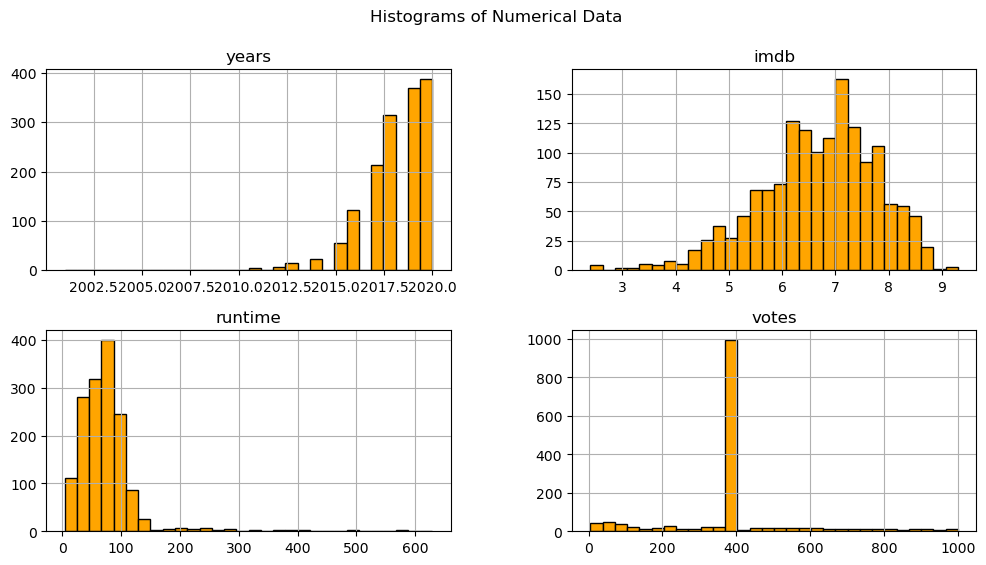

In [156]:
# plot the histogram for numerical data
numeric_columns = ['years','imdb','runtime','votes']

df[numeric_columns].hist(figsize=(12, 6), bins=30, color='orange', edgecolor='black')

plt.suptitle('Histograms of Numerical Data')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_17084\2551778412.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




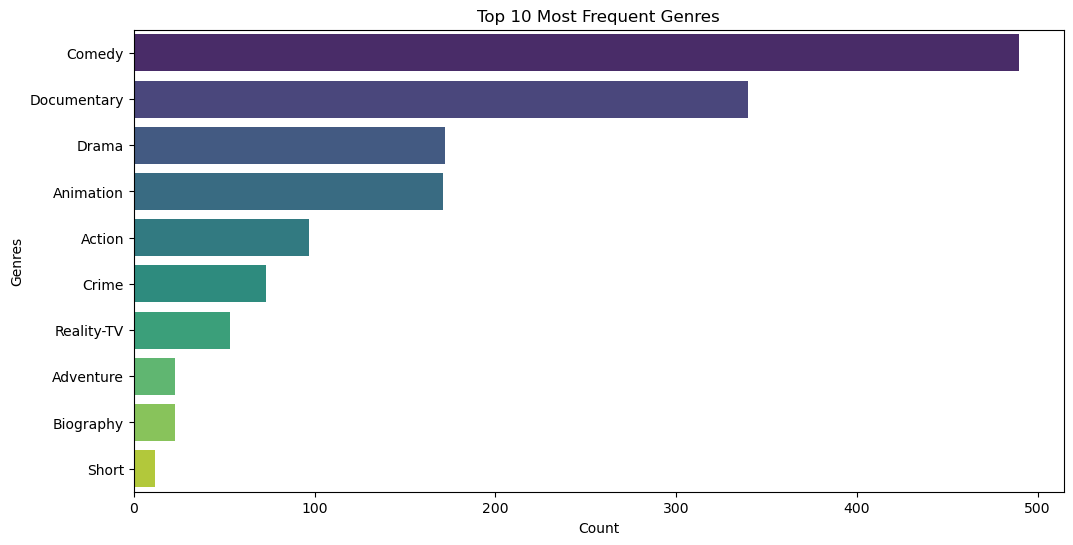

In [157]:
# plotting top 10 genres 
top_10_genres = df['genres'].value_counts().nlargest(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.title('Top 10 Most Frequent Genres')
plt.show()

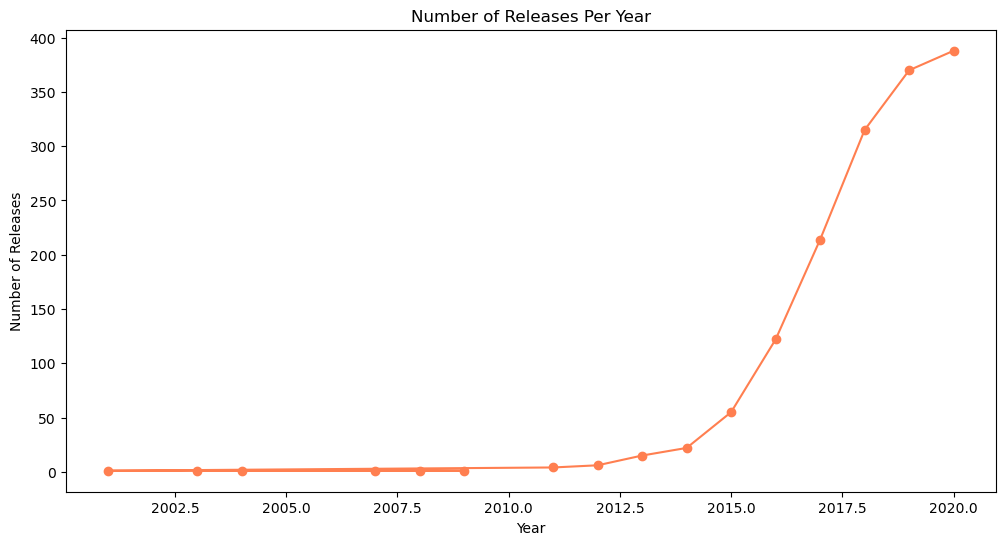

In [158]:
# line chart for number of releases per year 
releases_per_year = df['years'].value_counts()

plt.figure(figsize=(12,6))
plt.plot(releases_per_year.index, releases_per_year.values, marker='o', color='coral')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Number of Releases Per Year')
plt.show()

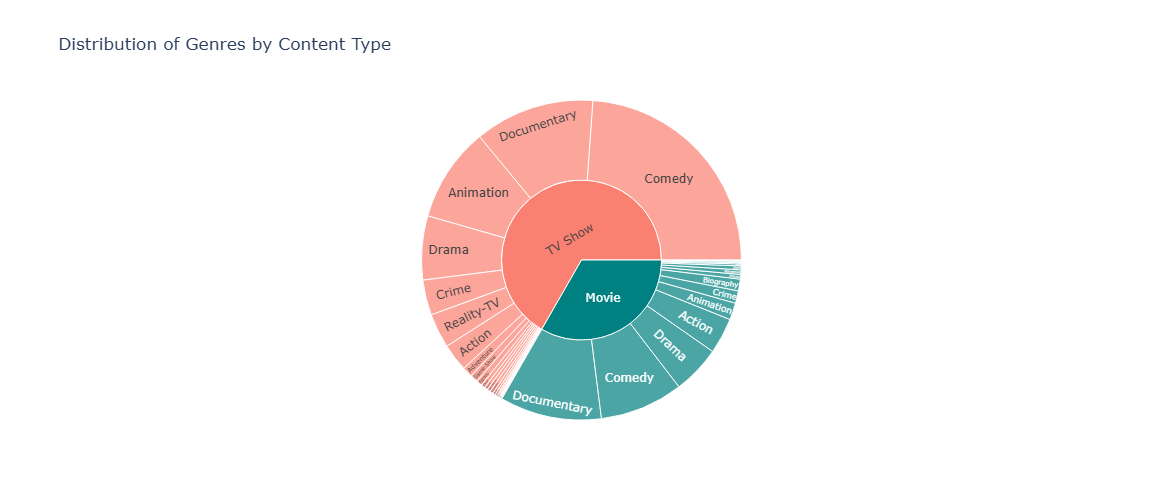

In [159]:
# Sunburst char for the distribution of genres by content type.
sunburst_df = df[['genres', 'type']]

fig = px.sunburst(sunburst_df, path=['type', 'genres'], title="Distribution of Genres by Content Type",  
                  color='type', color_discrete_map={'Movie': 'teal','TV Show': 'salmon'}, width=500, height=500)

fig.show()

### Encoding Categorical Features

**Categorical Columns to encode and which type of econding I will be using next:**.

- *type* (Movie, TV Show) : one-hot encoding , since there is only a few categories and theres is not a sequence
- *genres* (Drama, Comedy, etc.) : one-hote encoding, there is no pattern within this column
- *starts* (actors names) : laben encoding, there is many diferent names
- *original* (Yes/No) : label encoding, there is only two values, binary category
- *titles and description* : will remain the same as they are unique values and they are not of primary relevance for the analysis

In [164]:
# one-hot encoding (type)
type_encoding = pd.get_dummies(df['type']).astype(int)
type_encoding

,Movie,TV Show
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1512,1,0
1513,1,0
1514,1,0
1515,1,0


In [166]:
# one-hot encoding (genres)
genres_encoding = pd.get_dummies(df['genres']).astype(int)
genres_encoding

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1513,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1514,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1515,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
# label encoding (starts)
le = LabelEncoder()

stars_encoding = le.fit_transform(df['stars'])
stars_encoding

array([ 461, 1127,    7, ..., 1228,    5, 1045])

In [172]:
# label encoding (original)
le = LabelEncoder()

original_encoding = le.fit_transform(df['original'])
original_encoding

array([0, 0, 0, ..., 0, 0, 0])

In [173]:
# encoding every categorical column within the dataframe
le = LabelEncoder()

df['stars'] = le.fit_transform(df['stars'])
df['original'] = le.fit_transform(df['original'])
df = pd.get_dummies(df, columns=['type', 'genres'])

df.head()

,titles,years,imdb,runtime,description,stars,votes,original,type_Movie,type_TV Show,...,genres_Music,genres_Musical,genres_Mystery,genres_Reality-TV,genres_Romance,genres_Sci-Fi,genres_Short,genres_Sport,genres_Talk-Show,genres_Thriller
0,Zumbo's Just Desserts,2016,6.9,52.000000,Amateur Australian chefs compete to impress pa...,461,393.6814,0,False,True,...,False,False,False,True,False,False,False,False,False,False
1,Zona Rosa,2019,6.0,74.471003,Add a Plot,1127,33.0000,0,False,True,...,False,False,False,False,False,False,False,False,False,False
2,Young Wallander,2020,6.7,74.471003,Follow recently graduated police officer Kurt ...,7,393.6814,0,False,True,...,False,False,False,False,False,False,False,False,False,False
3,You vs. Wild,2019,6.7,20.000000,"In this interactive series, you'll make key de...",125,393.6814,0,False,True,...,False,False,False,False,False,False,False,False,False,False
4,You,2018,7.8,45.000000,"A dangerously charming, intensely obsessive yo...",1086,393.6814,0,False,True,...,False,False,False,False,False,False,False,False,False,False


#### Indentifying Outliers

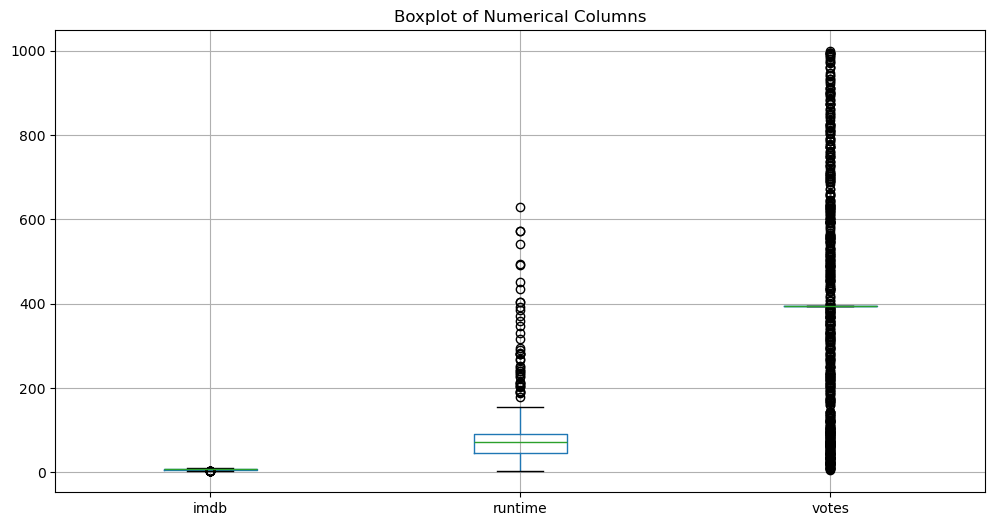

Outliers per column:
 imdb        18
runtime     46
votes      543
dtype: int64


In [187]:
# numerical columns
numerical_cols = ['imdb', 'runtime', 'votes']

# box plot 
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot()
plt.title("Boxplot of Numerical Columns")
plt.show()

# Identificar cuántos outliers hay por columna
outliers = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).sum()
print("Outliers per column:\n", outliers)


*Since there is a few amount of outliers in Runtime(46 values) and in Imdb(18) I am opting for deliting them.
In the case of Votes, the outliers represent the 35.8% of the total values, so I will be replacing them with the median value instead*

In [195]:
# deliting outliers for imdb and runtime
Q1 = df[['imdb', 'runtime']].quantile(0.25)
Q3 = df[['imdb', 'runtime']].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where imdb and runtime are outside these limits
df = df[(df['imdb'] >= lower_bound['imdb']) & (df['imdb'] <= upper_bound['imdb'])]
df = df[(df['runtime'] >= lower_bound['runtime']) & (df['runtime'] <= upper_bound['runtime'])]

print(f"Data after removing outliers: {df.shape}")

Data after removing outliers: (1453, 33)


In [199]:
# replacing outliers values for the median for votes
Q1_votes = df['votes'].quantile(0.25)
Q3_votes = df['votes'].quantile(0.75)
IQR_votes = Q3_votes - Q1_votes

# Define the lower and upper thresholds
lower_bound_votes = Q1_votes - 1.5 * IQR_votes
upper_bound_votes = Q3_votes + 1.5 * IQR_votes

# Compute the median of votes
median_votes = df['votes'].median()

# Replace outliers with the median
df['votes'] = df['votes'].apply(lambda x: median_votes if x < lower_bound_votes or x > upper_bound_votes else x)

print(f"New values for outliers in 'votes': {median_votes}")

New values for outliers in 'votes': 393.6813996316759


#### Performing feature scaling techniques  *(StandardScaler, MinMaxScaler and RobustScaler)*

In [213]:
# Select only numerical columns for scaling
num_cols = ['imdb', 'runtime', 'votes']

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

# Apply scalers
df_standard = df.copy()
df_standard[num_cols] = standard_scaler.fit_transform(df_standard[num_cols])

df_minmax = df.copy()
df_minmax[num_cols] = minmax_scaler.fit_transform(df_minmax[num_cols])

df_robust = df.copy()
df_robust[num_cols] = robust_scaler.fit_transform(df_robust[num_cols])


In [211]:
print("StandardScaler:\n")
df_standard.head()

StandardScaler:



,titles,years,imdb,runtime,description,stars,votes,original,type_Movie,type_TV Show,...,genres_Music,genres_Musical,genres_Mystery,genres_Reality-TV,genres_Romance,genres_Sci-Fi,genres_Short,genres_Sport,genres_Talk-Show,genres_Thriller
0,Zumbo's Just Desserts,2016,0.197603,-0.525524,Amateur Australian chefs compete to impress pa...,461,1.136868e-13,0,False,True,...,False,False,False,True,False,False,False,False,False,False
1,Zona Rosa,2019,-0.678134,0.256470,Add a Plot,1127,1.136868e-13,0,False,True,...,False,False,False,False,False,False,False,False,False,False
2,Young Wallander,2020,0.002995,0.256470,Follow recently graduated police officer Kurt ...,7,1.136868e-13,0,False,True,...,False,False,False,False,False,False,False,False,False,False
3,You vs. Wild,2019,0.002995,-1.639127,"In this interactive series, you'll make key de...",125,1.136868e-13,0,False,True,...,False,False,False,False,False,False,False,False,False,False
4,You,2018,1.073341,-0.769124,"A dangerously charming, intensely obsessive yo...",1086,1.136868e-13,0,False,True,...,False,False,False,False,False,False,False,False,False,False


In [217]:
print("MinMaxScaler:\n")
df_minmax.head()

MinMaxScaler:



,titles,years,imdb,runtime,description,stars,votes,original,type_Movie,type_TV Show,...,genres_Music,genres_Musical,genres_Mystery,genres_Reality-TV,genres_Romance,genres_Sci-Fi,genres_Short,genres_Sport,genres_Talk-Show,genres_Thriller
0,Zumbo's Just Desserts,2016,0.576923,0.320000,Amateur Australian chefs compete to impress pa...,461,0.0,0,False,True,...,False,False,False,True,False,False,False,False,False,False
1,Zona Rosa,2019,0.403846,0.469807,Add a Plot,1127,0.0,0,False,True,...,False,False,False,False,False,False,False,False,False,False
2,Young Wallander,2020,0.538462,0.469807,Follow recently graduated police officer Kurt ...,7,0.0,0,False,True,...,False,False,False,False,False,False,False,False,False,False
3,You vs. Wild,2019,0.538462,0.106667,"In this interactive series, you'll make key de...",125,0.0,0,False,True,...,False,False,False,False,False,False,False,False,False,False
4,You,2018,0.750000,0.273333,"A dangerously charming, intensely obsessive yo...",1086,0.0,0,False,True,...,False,False,False,False,False,False,False,False,False,False


In [221]:
print("RobustScaler:\n")
df_robust.head()

RobustScaler:



,titles,years,imdb,runtime,description,stars,votes,original,type_Movie,type_TV Show,...,genres_Music,genres_Musical,genres_Mystery,genres_Reality-TV,genres_Romance,genres_Sci-Fi,genres_Short,genres_Sport,genres_Talk-Show,genres_Thriller
0,Zumbo's Just Desserts,2016,0.071429,-0.428571,Amateur Australian chefs compete to impress pa...,461,0.0,0,False,True,...,False,False,False,True,False,False,False,False,False,False
1,Zona Rosa,2019,-0.571429,0.106452,Add a Plot,1127,0.0,0,False,True,...,False,False,False,False,False,False,False,False,False,False
2,Young Wallander,2020,-0.071429,0.106452,Follow recently graduated police officer Kurt ...,7,0.0,0,False,True,...,False,False,False,False,False,False,False,False,False,False
3,You vs. Wild,2019,-0.071429,-1.190476,"In this interactive series, you'll make key de...",125,0.0,0,False,True,...,False,False,False,False,False,False,False,False,False,False
4,You,2018,0.714286,-0.595238,"A dangerously charming, intensely obsessive yo...",1086,0.0,0,False,True,...,False,False,False,False,False,False,False,False,False,False


- imdb: StandardScaler because it’s likely normally distributed with values between 0 and 10.
- runtime: RobustScaler to handle outliers (movies with very long durations).
- votes: RobustScaler because of the expected outliers (some movies having either very few or very high votes).

In short, StandardScaler works best for imdb (normal distribution), and RobustScaler is better for runtime and votes because it deals better with outliers.